Name: Nguyễn Lâm Vĩnh Gia - ID: 2052074

# GRADIENT DESCENT FOR RIDGE REGRESSION EXERCISE

## I. Overview

Ridge regression is actually not a new type of regression, but a regularization method implemented on current regression models such as Linear Regression, Logistic Regression, in order to avoid overfitting due to the high weights of a few features happening to only one class of the data. In this context, I will constraint the Rigde Regression only used for Linear Regression model. The difference between Ridge Regression and normal Linear Regression is the formula of the loss function. While normal Linear Regression used MSE to find the weights and intercept, which is very sensitive to the change in data, the Ridge Regression add a penalty terms into the current loss function, in order to limit the value of the weights and reduce the sensitivity of the model to the new data. The loss function of Ridge Regression is

$$ Rigde \: Loss(y,y_{pred}) = MSE(y,y_{pred}) + \alpha.||\theta||^{2}_{2} = \frac{1}{n}(y - X\theta)^T(y - X\theta) + \alpha\theta^T\theta $$

Taking the partial derivative wrt $ \theta_{i} $, we get the gradient equation of the Ridge Regression is

$$ \frac{df}{d\theta_{i}} = \frac{-2}{n} X^{T}(y - X\theta_{i}) + 2\alpha\theta_{i} $$

## II. Implementation

In this exercise, I will going to implement the sample code provided in BKEL to create the Batch, Mini-batch and Stochastic Gradient Descent algorithm for Ridge Regression.

### 1. Data processing

Generate a linear dataset for the execrcise

Length of the dataset: 100


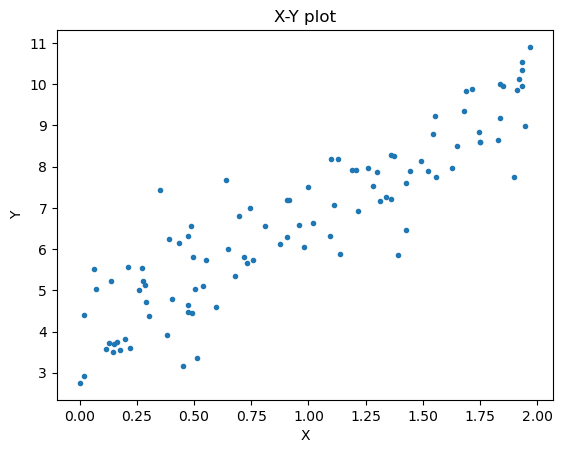

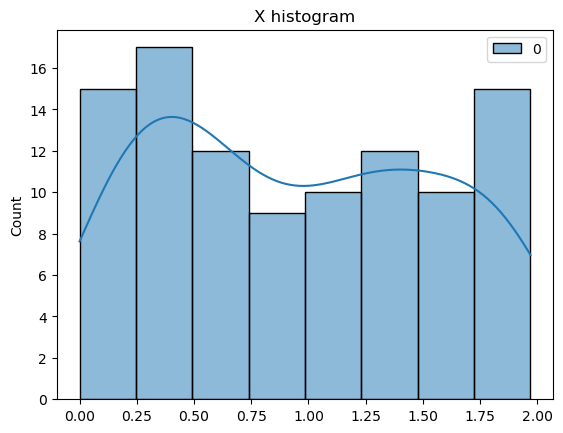

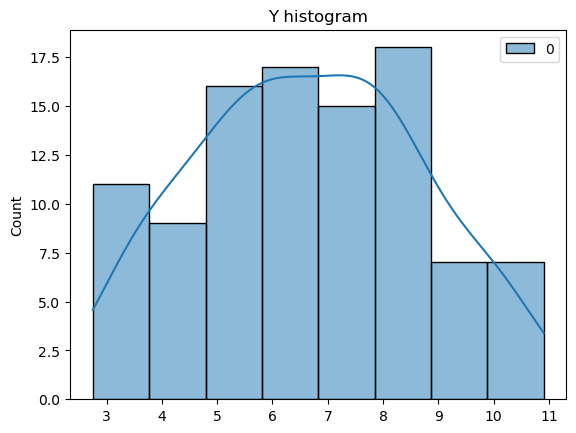

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate dataset
np.random.seed(13)
X = 2 * np.random.rand(100,1)
Y = 4 + 3 * X + np.random.randn(100,1)
print("Length of the dataset: {}".format(len(X)))

# Plot the dataset
plt.plot(X,Y,'.')
plt.title("X-Y plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

sns.histplot(X, kde=True)
plt.title("X histogram")
plt.show()

sns.histplot(Y, kde=True)
plt.title("Y histogram")
plt.show()

### 2. Batch Gradient Descent

Batch or conventional Gradient Descent is the optimization algorithm that is used to find the local minimum of the convex loss function (function which has only one local minimum). By taking the derivative of the loss function and iteratively calculate the slope of the current point value, the Gradient Descent will move closer and close to the actual local minimum, and the developer must decide the jump of each calculation, as well as the number of iteration for the fastest convergence to the local minimum.

In [29]:
# Funciton for initiation of data vectors
def initialization(X):
    # Initiate the weight vector
    weight = np.zeros((np.shape(X)[1] + 1, 1))
    # Concatenate a column of 1 for matrix multiplication of X and weight vector + intercept
    X = np.c_[np.ones((np.shape(X)[0], 1)), X]
    return weight, X

def batchGradient(X, y, alpha = 0.001, learn_rate = 0.1, n_iter = 1000):
    weight, X = initialization(X)
    w_gd_list = list()
    for i in range(n_iter):
        gradient = (-2 / len(y)) * np.dot(X.T, (y - np.dot(X, weight))) + 2*alpha*weight
        weight = weight - learn_rate*gradient
        w_gd_list.append(weight)
    return weight, w_gd_list

w_gd, w_gd_list = batchGradient(X, Y)
print(w_gd)

[[3.82344643]
 [2.98032829]]


### 3. Stochastic Gradient Descent

The Stochastic (random) Gradient Descent is quite similar to the conventional Batch Gradient Descent except that instead of using the whole dataset, this algorithm will randomly pick only one sample at each iteration, which makes it much faster.

In [30]:
def stochasticGradient(X, y, alpha = 0.001, learn_rate = 0.1, n_iter = 1000):
    weight, X = initialization(X)
    w_sgd_list = list()
    for i in range(n_iter):
        # Randomly select one sample
        rand_idx = np.random.randint(len(y))
        Xs = X[rand_idx:rand_idx + 1]
        ys = y[rand_idx:rand_idx + 1]

        gradient = -2 * np.dot(Xs.T, (ys - np.dot(Xs, weight))) + 2*alpha*weight
        weight = weight - learn_rate * gradient
        w_sgd_list.append(weight)
    return weight, w_sgd_list

w_sgd, w_sgd_list = stochasticGradient(X,Y)
print(w_sgd)

[[3.96511082]
 [3.27840163]]


### 4. Mini-batch Gradient Descent

Mini-batch stands between batch and stochastic Gradient Descent as it takes a group of m (0 < m < dataset size) samples at every iteraiton, which will be more fit to the computational resources than the Batch one, and converge steadier than Stochastic Gradient Descent. Moreover, by choosing the batch size appropriately, we can process every sample in a mini-batch in parallel and then accumulate the loss, which those 2 approaches can not be utilized.

In [31]:
def miniBatchGradient(X, y, batch_size, alpha = 0.001, learn_rate = 0.1, n_iter = 1000):
    weight, X = initialization(X)
    w_mgd_list = list()
    for i in range(n_iter):
        indexes = np.random.randint(0, len(X), batch_size)
        Xs = X[indexes]
        ys = y[indexes]        
        gradient = (-2 / batch_size) * np.dot(Xs.T, (ys - np.dot(Xs, weight))) + 2*alpha*weight
        weight = weight - learn_rate * gradient
        w_mgd_list.append(weight)
    return weight, w_mgd_list

w_mgd, w_mgd_list = miniBatchGradient(X,Y, 8)
print(w_mgd)

[[3.75362315]
 [3.01695752]]


### 5. Convergence rate

Let compare the convergence rate of those 3 Gradient Descent method for Ridge Regression.


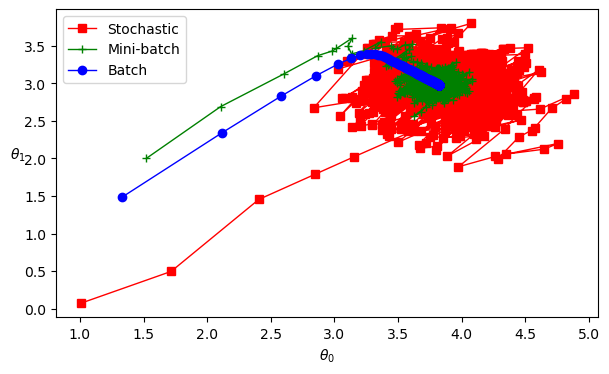

In [33]:
w_sgd_list = np.array(w_sgd_list)
w_mgd_list = np.array(w_mgd_list)
w_gd_list = np.array(w_gd_list)

plt.figure(figsize=(7,4))
plt.plot(w_sgd_list[:, 0], w_sgd_list[:, 1], "r-s", linewidth=1,label="Stochastic")
plt.plot(w_mgd_list[:, 0], w_mgd_list[:, 1], "g-+", linewidth=1,label="Mini-batch")
plt.plot(w_gd_list[:, 0], w_gd_list[:, 1], "b-o", linewidth=1, label="Batch")
plt.legend(loc="upper left", fontsize=10)
plt.xlabel(r"$\theta_0$", fontsize=10)
plt.ylabel(r"$\theta_1$ ", fontsize=10, rotation=0)
plt.show()

### 6. Conclusion

From the above figure, we can see that the Stochastic Gradient Descent move is very fluctuating as it takes only one random sample as a time. On the other hand, both the Batch and Mini-batch performance are quite similar, while the Mini-batch tends to converge faster, the Batch Gradient Descent converges more steadily as it takes the whole sample size for approximation. However, with much larger dataset, the Batch traning will takes a lot of time for computation, which makes the Mini-batch the most optimized method for training the dataset. Besides, the alpha value of the Ridge Regression can also be tuned for optimizing the effect of the train data on the model to avoid overfitting.

## III. References

[1]. Phung Thanh Huy, Gradient Descent Sample Code, September 21, 2023.

[2]. Boris Giba, Ridge Regression Explained, Step by Step, https://machinelearningcompass.com/machine_learning_models/ridge_regression/, Nov 02, 2021.